# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Anatasia Dyahmaharani
- **Email:** anatasia.d.maharani@gmail.com
- **ID Dicoding:** anatasia_dy

## Menentukan Pertanyaan Bisnis

1. Apa tren jumlah penyewaan sepeda setiap bulannya?
2. Bagaimana hubungan antara faktor cuaca dan jumlah penyewaan sepeda di setiap musim?
3. Bagaimana tren penyewaan sepeda untuk pengguna casual dan registered dari bulan ke bulan?

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
from google.colab import files

day_df = pd.read_csv('day.csv')
day_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

***Insight dari day.csv***
- Variasi Jumlah Penyewaan: Terdapat perbedaan jumlah penyewaan sepeda setiap hari, misalnya 985 penyewaan pada 2011-01-01 dan 801 pada 2011-01-02.
- Pengaruh Musim: Musim memengaruhi pola penyewaan sepeda, dengan masing-masing musim menunjukkan jumlah penyewaan yang berbeda.
- Hari Kerja vs. Libur: Perbedaan signifikan antara jumlah penyewaan pada hari kerja dan hari libur (kolom workingday).
- Demografi Pengguna: Terdapat perbedaan antara pengguna registered dan casual, dengan data jumlah masing-masing pada hari tertentu.

***Insight dari hour.csv***
- Penyewaan Berdasarkan Jam: Variasi jumlah penyewaan sepeda berdasarkan jam, dengan beberapa jam menunjukkan penyewaan lebih tinggi atau lebih rendah.
- Pengaruh Cuaca di Jam Tertentu: Kondisi cuaca memengaruhi jumlah penyewaan pada jam-jam tertentu (kolom weathersit).
- Demografi Pengguna Berdasarkan Jam: Perbedaan jumlah pengguna casual dan terdaftar yang menyewa sepeda pada jam tertentu.
- Kondisi Suhu dan Kelembapan: Suhu (kolom temp) dan kelembapan berpengaruh terhadap jumlah penyewaan, terlihat berdasarkan jam.

### Assessing Data

#### Menilai Tabel `day_df`


In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [9]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**

**Data Frame Overview**
- Jumlah Entri: Terdapat 731 entri dalam dataset, yang mencakup penyewaan sepeda selama dua tahun.
- Kolom dan Tipe Data: Dataset memiliki 16 kolom dengan berbagai tipe data: 11 kolom bertipe integer, 4 kolom bertipe float, dan 1 kolom bertipe objek (tanggal) **yang nanti harus kita ubah ke format datetime**.

**Data Completeness**
- Missing Values: Tidak ada nilai yang hilang dalam dataset, menunjukkan bahwa data ini lengkap.
- Duplicated Rows: Tidak ada duplikasi dalam dataset, yang berarti setiap entri unik.

**Descriptive Statistics**
- Jumlah Penyewaan (`cnt`): Rata-rata jumlah penyewaan sepeda adalah sekitar 4504, dengan nilai maksimum mencapai 8714. Ini menunjukkan potensi tinggi dalam penggunaan sepeda di waktu tertentu.
- Pengguna Registered vs. Casual: Rata-rata pengguna registered (3656) lebih banyak dibandingkan dengan pengguna casual (848), menunjukkan bahwa layanan ini lebih banyak digunakan oleh pengguna yang registered.
- Kondisi Cuaca: Nilai `weathersit` menunjukkan bahwa sebagian besar hari dalam dataset memiliki kondisi cuaca baik, dengan rata-rata 1.39, yang mungkin berkontribusi pada tingkat penyewaan yang lebih tinggi.

**Variasi Musiman dan Hari Kerja**
- Musiman: Rata-rata penggunaan sepeda tertinggi terjadi pada bulan tertentu (kolom `mnth`), tetapi perlu analisis lebih lanjut untuk menentukan pola berdasarkan musim (kolom `season`).
- Hari Kerja: Pengguna cenderung menyewa sepeda lebih banyak pada hari kerja (kolom `workingday`), terlihat dari persentase tinggi untuk nilai 1 di kolom ini.

**Rata-rata Suhu dan Kelembapan**
- Suhu (`temp` dan `atemp`): Rata-rata suhu berkisar di sekitar 0.47, dengan suhu minimum 0.06 dan maksimum 0.86. Ini menunjukkan bahwa penyewaan sepeda cenderung lebih tinggi pada suhu yang lebih hangat.
- Kelembapan (`hum`): Rata-rata kelembapan berada di sekitar 0.63, dan dapat mempengaruhi kenyamanan pengguna dalam menyewa sepeda.

#### Menilai Tabel `hour_df`


In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [12]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**

**Data Frame Overview**
- Jumlah Entri: Terdapat 731 entri dalam dataset, yang mencakup penyewaan sepeda selama dua tahun.
- Kolom dan Tipe Data: Dataset memiliki 16 kolom dengan berbagai tipe data: 11 kolom bertipe integer, 4 kolom bertipe float, dan 1 kolom bertipe objek (tanggal).

**Data Completeness**
- Missing Values: Tidak ada nilai yang hilang dalam dataset, menunjukkan bahwa data ini lengkap.
- Duplicated Rows: Tidak ada duplikasi dalam dataset, yang berarti setiap entri unik.

**Descriptive Statistics**
- Jumlah Penyewaan (`cnt`): Rata-rata jumlah penyewaan sepeda adalah sekitar 4504, dengan nilai maksimum mencapai 8714. Ini menunjukkan potensi tinggi dalam penggunaan sepeda di waktu tertentu.
- Pengguna Registered vs. Casual: Rata-rata pengguna registered (3656) lebih banyak dibandingkan dengan pengguna casual (848), menunjukkan bahwa layanan ini lebih banyak digunakan oleh pengguna yang registered.
- Kondisi Cuaca: Nilai `weathersit` menunjukkan bahwa sebagian besar hari dalam dataset memiliki kondisi cuaca baik, dengan rata-rata 1.39, yang mungkin berkontribusi pada tingkat penyewaan yang lebih tinggi.

**Variasi Musiman dan Hari Kerja**
- Musiman: Rata-rata penggunaan sepeda tertinggi terjadi pada bulan tertentu (kolom `mnth`), tetapi perlu analisis lebih lanjut untuk menentukan pola berdasarkan musim (kolom `season`).
- Hari Kerja: Pengguna cenderung menyewa sepeda lebih banyak pada hari kerja (kolom `workingday`), terlihat dari persentase tinggi untuk nilai 1 di kolom ini.

**Rata-rata Suhu dan Kelembapan**
- Suhu (`temp` dan `atemp`): Rata-rata suhu berkisar di sekitar 0.47, dengan suhu minimum 0.06 dan maksimum 0.86. Ini menunjukkan bahwa penyewaan sepeda cenderung lebih tinggi pada suhu yang lebih hangat.
- Kelembapan (`hum`): Rata-rata kelembapan berada di sekitar 0.63, dan dapat mempengaruhi kenyamanan pengguna dalam menyewa sepeda.

### Cleaning Data

#### Tabel `day_df`

**Duplicated data dan Missing Values**

In [13]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.isna().sum()

Jumlah duplikasi:  0


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Innacurate Value**

In [14]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Memperbaiki Tipe Data**

In [15]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [16]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Tabel` hour_df`

**Duplicated data dan Missing Values**

In [17]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.isna().sum()

Jumlah duplikasi:  0


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Innacurate Values**

In [18]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Memperbaiki Tipe Data**

In [19]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [20]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**

- Kedua tabel tidak memiliki missing values maupun duplicated data
- Kolom *dteday* pada tabel `day_df` dan `hour_df`, yang awalnya bertipe data *object*, telah diubah menjadi tipe data *datetime* untuk memudahkan analisis berbasis waktu.

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [21]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
236,237,2011-08-25,3,0,8,0,4,1,2,0.684167,0.645854,0.771667,0.210833,435,3107,3542
413,414,2012-02-18,1,1,2,0,6,0,1,0.346667,0.355425,0.534583,0.190929,1435,2883,4318
711,712,2012-12-12,4,1,12,0,3,1,2,0.297500,0.297338,0.538333,0.162937,310,5009,5319
199,200,2011-07-19,3,0,7,0,2,1,1,0.776667,0.747479,0.650417,0.130600,752,3789,4541
626,627,2012-09-18,3,1,9,0,2,1,2,0.623333,0.565067,0.872500,0.357587,371,3702,4073


In [22]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Season**

In [23]:
#2011
day_df_2011 = day_df[day_df['yr'] == 0]

season2011 = day_df_2011.groupby(by="season").agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "mean", "std"]
})

season2011_sorted= season2011.sort_values(by=('cnt', 'sum'), ascending=False)
season2011_sorted

casual                                     registered             \
          sum   max  min         mean         std        sum   max  min   
season                                                                    
3       95450  3065  118  1015.425532  554.916801     324200  4614  889   
2       77564  2355  121   843.086957  520.552109     269752  4414  674   
4       52813  2397   50   593.404494  504.441967     273324  4372  570   
1       21425  1424    9   238.055556  252.609365     128575  2841  416   

                                    cnt                            
               mean         std     sum         mean          std  
season                                                             
3       3448.936170  677.857596  419650  4464.361702   798.348077  
2       2932.086957  906.775638  347316  3775.173913  1138.901028  
4       3071.056180  786.175110  326137  3664.460674   983.006128  
1       1428.611111  497.286269  150000  1666.666667   614.012663

In [24]:
#2012
day_df_2012 = day_df[day_df['yr'] == 1]

season2012 = day_df_2012.groupby(by="season").agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "mean", "std"]
})

season2012_sorted = season2012.sort_values(by=('cnt', 'sum'), ascending=False)
season2012_sorted

casual                                     registered              \
           sum   max  min         mean         std        sum   max   min   
season                                                                      
3       130641  3160  371  1389.797872  579.161622     510838  6917  3195   
2       125958  3410  120  1369.108696  826.568007     445315  6456   907   
4        76969  3031    2   864.820225  669.109356     438507  6946    20   
1        39197  3155    9   430.736264  467.745345     282151  5315   432   

                                     cnt                            
               mean          std     sum         mean          std  
season                                                              
3       5434.446809   985.186535  641479  6824.244681   912.756191  
2       4840.380435  1010.116910  571273  6209.489130  1221.345569  
4       4927.044944  1355.921499  515476  5791.865169  1598.520901  
1       3100.560440  1109.648415  321348  3531.296703  1341.203270

In [25]:
# ALL YEAR
season_all_years = day_df.groupby(by="season").agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "mean", "std"]
})

season_all_years_sorted = season_all_years.sort_values(by=('cnt', 'sum'), ascending=False)
season_all_years_sorted

casual                                     registered             \
           sum   max  min         mean         std        sum   max  min   
season                                                                     
3       226091  3160  118  1202.611702  595.975032     835038  6917  889   
2       203522  3410  120  1106.097826  737.590829     715067  6456  674   
4       129782  3031    2   729.112360  606.318118     711831  6946   20   
1        60622  3155    9   334.928177  387.655561     410726  5315  416   

                                      cnt                            
               mean          std      sum         mean          std  
season                                                               
3       4441.691489  1304.626949  1061129  5644.303191  1459.800381  
2       3886.233696  1353.375628   918589  4992.331522  1695.977235  
4       3999.050562  1444.782557   841613  4728.162921  1699.615261  
1       2269.204420  1200.269751   471348  2604.132597  1399.942119

**Months**

In [26]:
#2011
day_df_2011 = day_df[day_df['yr'] == 0]

months_2011 = day_df_2011.groupby(by="mnth").agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "mean", "std"]
})

months_2011_sorted = months_2011.sort_values(by=('cnt', 'sum'), ascending=False)
months_2011_sorted

casual                                     registered              \
        sum   max  min         mean         std        sum   max   min   
mnth                                                                     
6     30612  1920  513  1020.400000  458.669861     112900  4488  2993   
7     36452  3065  562  1175.870968  665.455420     104889  4220  2298   
8     28842  1914  226   930.387097  359.765449     107849  4614   889   
5     31050  2355  255  1001.612903  525.722530     104771  4238  2213   
9     26545  2521  118   884.833333  599.444173     100873  4372  1689   
10    25222  2397   57   813.612903  617.780796      98289  4267   570   
11    15594  1275   69   519.800000  374.552091      86573  3891   935   
4     22346  1965  121   744.866667  497.720787      72524  3722   674   
12     8448   706   50   272.516129  168.638048      78875  3672   451   
3     12826  1424   46   413.741935  332.841501      51219  2355   491   
2      6242   694   47   222.928571  193.234827      41973  2348   905   
1      3073   331    9    99.129032   72.503215      35116  1844   416   

                                  cnt                            
             mean         std     sum         mean          std  
mnth                                                             
6     3763.333333  439.945869  143512  4783.733333   444.447812  
7     3383.516129  509.528074  141341  4559.387097   680.090762  
8     3479.000000  755.445608  136691  4409.387097   809.852401  
5     3379.709677  566.067911  135821  4381.322581   572.927883  
9     3362.433333  773.177576  127418  4247.266667   965.377251  
10    3170.612903  810.102655  123511  3984.225806  1103.481844  
11    2885.766667  788.097915  102167  3405.566667   788.249290  
4     2417.466667  809.575143   94870  3162.333333  1042.093593  
12    2544.354839  947.709082   87323  2816.870968   958.763187  
3     1652.225806  402.395387   64045  2065.967742   550.971716  
2     1499.035714  331.779990   48215  1721.964286   398.508839  
1     1132.774194  370.027540   38189  1231.903226   372.432665

In [27]:
#2012
day_df_2012 = day_df[day_df['yr'] == 1]

months_2012 = day_df_2012.groupby(by="mnth").agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "mean", "std"]
})

months_2012_sorted = months_2012.sort_values(by=('cnt', 'sum'), ascending=False)
months_2012_sorted

casual                                     registered              \
        sum   max  min         mean         std        sum   max   min   
mnth                                                                     
9     43778  3160  371  1459.266667  761.049273     174795  6946  3197   
8     43197  2827  935  1393.451613  449.915462     171306  6541  3341   
7     41705  2562  747  1345.322581  519.993166     161902  6790  3195   
6     43294  2963  477  1443.133333  770.864527     159536  6456  3594   
10    34538  3031    2  1114.129032  759.714540     164303  6911    20   
5     44235  3410  342  1426.935484  888.284562     151630  6433  2501   
4     38456  3252  120  1281.866667  843.933922     135768  5950   907   
3     31618  3155  203  1019.935484  701.334392     133257  5893  2339   
11    21009  2290  123   700.300000  542.275166     131655  5520  1470   
12    13245  1153    9   427.258065  244.896028     110468  6055   432   
2      8721  1435   65   300.724138  262.347084      94416  4546  1456   
1      8969  1070   67   289.322581  235.103295      87775  4185  1234   

                                   cnt                            
             mean          std     sum         mean          std  
mnth                                                              
9     5826.500000  1065.437089  218573  7285.766667   979.160925  
8     5526.000000   942.817833  214503  6919.451613   794.059017  
7     5222.645161   935.328447  203607  6567.967742   867.183736  
6     5317.866667   802.526817  202830  6761.000000   954.204995  
10    5300.096774  1665.547865  198841  6414.225806  1941.819400  
5     4891.290323   963.828761  195865  6318.225806  1078.403997  
4     4525.600000  1056.822551  174224  5807.466667  1308.938916  
3     4298.612903   935.885487  164875  5318.548387  1251.162682  
11    4388.500000  1112.181539  152664  5088.800000  1129.731198  
12    3563.483871  1711.587409  123713  3990.741935  1803.227864  
2     3255.724138   839.594200  103137  3556.448276   870.724640  
1     2831.451613   792.457689   96744  3120.774194   872.852134

In [28]:
# ALL YEAR
months_all_years = day_df.groupby(by="mnth").agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "mean", "std"]
})

months_all_years_sorted = months_all_years.sort_values(by=('cnt', 'sum'), ascending=False)
months_all_years_sorted

casual                                     registered              \
        sum   max  min         mean         std        sum   max   min   
mnth                                                                     
8     72039  2827  226  1161.919355  466.576274     279155  6541   889   
6     73906  2963  477  1231.766667  664.017647     272436  6456  2993   
9     70323  3160  118  1172.050000  738.378375     275668  6946  1689   
7     78157  3065  562  1260.596774  598.382778     266791  6790  2298   
5     75285  3410  255  1214.274194  754.950311     256401  6433  2213   
10    59760  3031    2   963.870968  703.205576     262592  6911    20   
4     60802  3252  120  1013.366667  738.345585     208292  5950   674   
11    36603  2290   69   610.050000  470.933096     218228  5520   935   
3     44444  3155   46   716.838710  624.308094     184476  5893   491   
12    21693  1153    9   349.887097  222.634531     189343  6055   432   
2     14963  1435   47   262.508772  232.283549     136389  4546   905   
1     12042  1070    9   194.225806  197.384490     122891  4185   416   

                                   cnt                            
             mean          std     sum         mean          std  
mnth                                                              
8     4502.500000  1335.126601  351194  5664.419355  1494.516146  
6     4540.600000  1012.958885  346342  5772.366667  1240.400031  
9     4594.466667  1547.716749  345991  5766.516667  1810.130649  
7     4303.080645  1190.542490  344948  5563.677419  1273.751871  
5     4135.500000  1093.179612  331686  5349.774194  1298.711561  
10    4235.354839  1685.022519  322352  5199.225806  1988.392517  
4     3471.533333  1414.571151  269094  4484.900000  1776.160778  
11    3637.133333  1219.589045  254831  4247.183333  1285.712709  
3     2975.419355  1513.254354  228920  3692.258065  1899.301812  
12    3053.919355  1465.052959  211036  3403.806452  1549.639353  
2     2392.789474  1091.126003  151352  2655.298246  1145.313307  
1     1982.112903  1053.274474  134933  2176.338710  1161.674370

**Weekday**

In [29]:
#2011
day_df_2011 = day_df[day_df['yr'] == 0]

weekday_2011 = day_df_2011.groupby(by="weekday").agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "mean", "std"]
})

weekday_2011_sorted = weekday_2011.sort_values(by=('cnt', 'sum'), ascending=False)
weekday_2011_sorted

casual                                    registered              \
           sum   max min         mean         std        sum   max   min   
weekday                                                                    
5        29453  1318  38   566.403846  347.996240     152553  4414  1129   
2        23989  1281   9   461.326923  303.090275     156349  4614   674   
1        31560  3065  41   606.923077  493.105837     148661  4157   883   
6        59547  2418  57  1123.528302  719.889538     120196  3647   570   
0        59603  2521  54  1146.211538  661.955106     117471  3466   451   
4        22440  1027  15   431.538462  277.177119     152112  4488   416   
3        20660   949  25   397.307692  266.841845     148509  4411   472   

                                      cnt                            
                mean          std     sum         mean          std  
weekday                                                              
5        2933.711538  1010.447471  182006  3500.115385  1294.243464  
2        3006.711538  1108.841107  180338  3468.038462  1375.249966  
1        2858.865385  1007.967612  180221  3465.788462  1287.295788  
6        2267.849057   976.759800  179743  3391.377358  1642.921685  
0        2259.057692   860.463519  177074  3405.269231  1417.889153  
4        2925.230769  1086.931003  174552  3356.769231  1317.786775  
3        2855.942308  1104.332722  169169  3253.250000  1342.373401

In [30]:
#2012
day_df_2012 = day_df[day_df['yr'] == 1]

weekday_2012 = day_df_2012.groupby(by="weekday").agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "mean", "std"]
})

weekday_2012_sorted = weekday_2012.sort_values(by=('cnt', 'sum'), ascending=False)
weekday_2012_sorted

casual                                     registered              \
           sum   max  min         mean         std        sum   max   min   
weekday                                                                     
4        39020  1405   74   750.384615  387.744719     271823  6781  1470   
5        48785  2469  115   938.173077  529.541449     256999  6917  2307   
3        36659  2562    9   704.980769  454.535552     267220  6946   432   
6        94305  3410   67  1813.557692  989.554394     203759  5966  1182   
2        33854  1348   87   651.038462  356.433750     254917  6697   573   
1        39224  2557    2   740.075472  490.107635     236058  6435    20   
0        80918  3283   73  1526.754717  898.420342     186035  5657   907   

                                      cnt                            
                mean          std     sum         mean          std  
weekday                                                              
4        5227.365385  1251.759374  310843  5977.750000  1535.537574  
5        4942.288462  1198.381692  305784  5880.461538  1591.761134  
3        5138.846154  1457.443577  303879  5843.826923  1779.272794  
6        3918.442308  1177.325341  298064  5732.000000  2066.027419  
2        4902.250000  1336.956727  288771  5553.288462  1622.522489  
1        4453.924528  1498.215167  275282  5194.000000  1815.870664  
0        3510.094340  1125.738634  266953  5036.849057  1922.767931

In [31]:
# ALL YEAR
weekday_all_year = day_df.groupby(by="weekday").agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "mean", "std"]
})

weekday_all_year_sorted = weekday_all_year.sort_values(by=('cnt', 'sum'), ascending=False)
weekday_all_year_sorted

casual                                    registered              \
            sum   max min         mean         std        sum   max   min   
weekday                                                                     
5         78238  2469  38   752.288462  483.422400     409552  6917  1129   
4         61460  1405  15   590.961538  371.680307     423935  6781   416   
6        153852  3410  57  1465.257143  927.082884     323955  5966   570   
3         57319  2562   9   551.144231  401.808954     415729  6946   432   
2         57843  1348   9   556.182692  342.748705     411266  6697   573   
1         70784  3065   2   674.133333  493.777298     384719  6435    20   
0        140521  3283  54  1338.295238  809.324777     303506  5657   451   

                                      cnt                            
                mean          std     sum         mean          std  
weekday                                                              
5        3938.000000  1494.998698  487790  4690.288462  1874.624870  
4        4076.298077  1642.753330  485395  4667.259615  1939.433317  
6        3085.285714  1358.068784  477807  4550.542857  2196.693009  
3        3997.394231  1723.710208  473048  4548.538462  2038.095884  
2        3954.480769  1549.462149  469109  4510.663462  1826.911642  
1        3663.990476  1504.215925  455503  4338.123810  1793.074013  
0        2890.533333  1179.713036  444027  4228.828571  1872.496629

**Workingday**

In [32]:
# 2011
day_df_2011 = day_df[day_df['yr'] == 0]

workingday_2011 = day_df_2011.groupby(by="workingday").agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "mean", "std"]
})

workingday_2011_sorted = workingday_2011.sort_values(by=('cnt', 'sum'), ascending=False)
workingday_2011_sorted

casual                                    registered             \
               sum   max min         mean         std        sum   max  min   
workingday                                                                    
1           118354  1318   9   473.416000  302.646577     737910  4614  416   
0           128898  3065  54  1120.852174  705.928656     257941  3647  451   

                                         cnt                            
                   mean          std     sum         mean          std  
workingday                                                              
1           2951.640000  1044.976058  856264  3425.056000  1297.860404  
0           2242.965217   925.351625  386839  3363.817391  1545.306116

In [33]:
# 2012
day_df_2012 = day_df[day_df['yr'] == 1]

workingday_2012 = day_df_2012.groupby(by="workingday").agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "mean", "std"]
})

workingday_2012_sorted = workingday_2012.sort_values(by=('cnt', 'sum'), ascending=False)
workingday_2012_sorted

casual                                    registered             \
               sum   max min         mean         std        sum   max  min   
workingday                                                                    
1           184931  2469   2   739.724000  424.212788    1251215  6946   20   
0           187834  3410  67  1619.258621  951.703828     425596  5966  573   

                                          cnt                            
                   mean          std      sum         mean          std  
workingday                                                               
1           5004.860000  1312.698863  1436146  5744.584000  1638.813697  
0           3668.931034  1215.840005   613430  5288.189655  2048.350908

In [34]:
# ALL YEAR
all_year_workingday = day_df.groupby(by="workingday").agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "mean", "std"]
})

all_year_workingday_sorted = all_year_workingday.sort_values(by=('cnt', 'sum'), ascending=False)
all_year_workingday_sorted

casual                                    registered             \
               sum   max min         mean         std        sum   max  min   
workingday                                                                    
1           303285  2469   2   606.570000  391.496032    1989125  6946   20   
0           316732  3410  54  1371.134199  873.064794     683537  5966  451   

                                          cnt                            
                   mean          std      sum         mean          std  
workingday                                                               
1           3978.250000  1568.692453  2292410  4584.820000  1878.415583  
0           2959.034632  1293.867686  1000269  4330.168831  2052.141245

**Holiday**

In [35]:
#2011
day_df_2011 = day_df[day_df['yr'] == 0]

holiday_2011 = day_df_2011.groupby(by="holiday").agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "mean", "std"]
})

holiday_2011_sorted = holiday_2011.sort_values(by=('cnt', 'sum'), ascending=False)
holiday_2011_sorted

casual                                    registered             \
            sum   max  min        mean         std        sum   max  min   
holiday                                                                    
0        237504  2521    9  669.025352  543.211705     975577  4614  416   
1          9748  3065  117  974.800000  898.588127      20274  3603  883   

                                       cnt                            
                mean          std      sum         mean          std  
holiday                                                               
0        2748.104225  1055.374581  1213081  3417.129577  1367.885285  
1        2027.400000  1039.929399    30022  3002.200000  1760.762385

In [36]:
#2012
day_df_2012 = day_df[day_df['yr'] == 1]
holiday_2012 = day_df_2012.groupby(by="holiday").agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "mean", "std"]
})

holiday_2012_sorted = holiday_2012.sort_values(by=('cnt', 'sum'), ascending=False)
holiday_2012_sorted

casual                                     registered             \
            sum   max  min         mean         std        sum   max  min   
holiday                                                                     
0        360154  3410    2  1014.518310  756.714054    1641009  6946   20   
1         12611  2562  217  1146.454545  858.610664      35802  5172  573   

                                       cnt                            
                mean          std      sum         mean          std  
holiday                                                               
0        4622.560563  1399.729487  2001163  5637.078873  1763.673125  
1        3254.727273  1641.622496    48413  4401.181818  2243.376554

In [37]:
# ALL YEAR
holiday_all_year = day_df.groupby(by="holiday").agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "mean", "std"]
})

holiday_all_year_sorted = holiday_all_year.sort_values(by=('cnt', 'sum'), ascending=False)
holiday_all_year_sorted

casual                                     registered             \
            sum   max  min         mean         std        sum   max  min   
holiday                                                                     
0        597658  3410    2   841.771831  680.528529    2616586  6946   20   
1         22359  3065  117  1064.714286  860.046809      56076  5172  573   

                                       cnt                            
                mean          std      sum         mean          std  
holiday                                                               
0        3685.332394  1553.704431  3214244  4527.104225  1929.013947  
1        2670.285714  1492.860246    78435  3735.000000  2103.350660

**Weathersit**

In [38]:
# 2011
day_df_2011 = day_df[day_df['yr'] == 0]

weathersit_2011 = day_df_2011.groupby(by="weathersit").agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "mean", "std"]
})

weathersit_2011_sorted = weathersit_2011.sort_values(by=('cnt', 'sum'), ascending=False)
weathersit_2011_sorted

casual                                   registered             \
               sum   max min        mean         std        sum   max  min   
weathersit                                                                   
1           177272  2521  15  784.389381  563.238547     657795  4614  416   
2            67987  3065   9  548.282258  510.718537     314937  4240  491   
3             1993   254  34  132.866667   71.472139      23119  2545  472   

                                         cnt                            
                   mean          std     sum         mean          std  
weathersit                                                              
1           2910.597345  1041.351652  835067  3694.986726  1336.999947  
2           2539.814516  1002.835220  382924  3088.096774  1286.876356  
3           1541.266667   771.483957   25112  1674.133333   830.518071

In [39]:
# 2012
day_df_2012 = day_df[day_df['yr'] == 1]

# Menghitung agregasi berdasarkan kondisi cuaca
weathersit_2012 = day_df_2012.groupby(by="weathersit").agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "mean", "std"]
})

weathersit_2012_sorted = weathersit_2012.sort_values(by=('cnt', 'sum'), ascending=False)
weathersit_2012_sorted

casual                                    registered              \
               sum   max min         mean         std        sum   max   min   
weathersit                                                                     
1           269074  3410  73  1135.333333  773.123504    1153811  6946  1379   
2           101789  3155  65   827.552846  685.830670     512145  6844   573   
3             1902  1264   2   317.000000  478.609653      10855  4324    20   

                                          cnt                            
                   mean          std      sum         mean          std  
weathersit                                                               
1           4868.400844  1299.969682  1422885  6003.734177  1611.870524  
2           4163.780488  1403.718618   613934  4991.333333  1759.657142  
3           1809.166667  1684.321753    12757  2126.166667  2011.653491

In [40]:
# ALL YEAR
weathersit_all_year = day_df.groupby(by="weathersit").agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "mean", "std"]
})

weathersit_all_year_sorted = weathersit_all_year.sort_values(by=('cnt', 'sum'), ascending=False)
weathersit_all_year_sorted

casual                                   registered             \
               sum   max min        mean         std        sum   max  min   
weathersit                                                                   
1           446346  3410  15  964.030238  700.476488    1811606  6946  416   
2           169776  3155   9  687.352227  619.082767     827082  6844  491   
3             3895  1264   2  185.476190  260.975022      33974  4324   20   

                                          cnt                            
                   mean          std      sum         mean          std  
weathersit                                                               
1           3912.755940  1533.347265  2257952  4876.786177  1879.483989  
2           3348.510121  1463.566884   996858  4035.862348  1809.109918  
3           1617.809524  1068.290954    37869  1803.285714  1240.284449

### Explore `hour_df`

In [41]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14014,14015,2012-08-12,3,1,8,3,0,0,0,1,0.62,0.5909,0.73,0.0896,11,37,48
14883,14884,2012-09-17,3,1,9,8,0,1,1,1,0.54,0.5152,0.77,0.0896,36,647,683
6437,6438,2011-09-30,4,0,9,19,0,5,1,1,0.54,0.5152,0.52,0.2836,42,332,374
7979,7980,2011-12-04,4,0,12,3,0,0,0,1,0.28,0.3182,0.75,0.0000,7,34,41
8149,8150,2011-12-11,4,0,12,5,0,0,0,1,0.18,0.2121,0.59,0.1045,0,6,6


In [42]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Hour**

In [43]:
hourly_counts = hour_df.groupby('hr').agg({
    'casual': ["sum", "max", "min", "mean", "std"],
    'registered': ["sum", "max", "min", "mean", "std"],
    'cnt': ["sum", "mean", "std"]
}).reset_index()

hourly_counts_sorted = hourly_counts.sort_values(by=('cnt', 'sum'), ascending=False)
hourly_counts_sorted

hr casual                                registered                       \
          sum  max min       mean        std        sum  max min        mean   
17  17  54220  347   0  74.273973  61.491021     282640  885  14  387.178082   
18  18  44496  266   0  61.120879  50.981553     265276  886  20  364.390110   
8    8  15761   69   0  21.679505  13.741229     245240  808   4  337.331499   
16  16  53834  367   0  73.745205  67.015206     173914  481   8  238.238356   
19  19  35505  230   0  48.770604  42.328913     191284  662  11  262.752747   
13  13  52713  355   0  72.308642  69.819228     132206  491   9  181.352538   
12  12  49718  362   0  68.293956  64.394237     134696  526   3  185.021978   
15  15  54606  357   0  74.905350  70.289359     128543  456   4  176.327846   
14  14  55089  361   0  75.567901  71.599225     120563  502  12  165.381344   
20  20  26378  237   0  36.233516  32.103347     138172  461   8  189.796703   
9    9  22458  142   0  30.891334  24.472856     136980  399   6  188.418157   
7    7   8037   40   0  11.055021   8.356205     146134  572   1  201.009629   
11  11  43286  268   0  59.540578  54.481788     108034  446   5  148.602476   
10  10  33789  209   0  46.477304  41.346206      92468  351   8  127.191197   
21  21  20570  222   0  28.255495  25.378252     104875  362   6  144.059066   
22  22  16200  175   0  22.252747  20.450211      79412  327   5  109.082418   
23  23  11065   71   0  15.199176  13.804596      52876  220   2   72.631868   
6    6   3017   19   0   4.161379   3.691509      52115  203   0   71.882759   
0    0   7375   68   0  10.158402  10.667953      31755  234   0   43.739669   
1    1   4709   49   0   6.504144   7.735334      19455  139   0   26.871547   
2    2   3412   44   0   4.772028   6.514780      12940  104   0   18.097902   
5    5   1012   16   0   1.411437   1.790581      13249   64   0   18.478382   
3    3   1893   26   0   2.715925   4.315795       6281   61   0    9.011478   
4    4    874   13   0   1.253945   1.887669       3554   22   0    5.098996   

                   cnt                          
           std     sum        mean         std  
17  211.676303  336860  461.452055  232.656611  
18  203.599896  309772  425.510989  224.639304  
8   229.698404  261001  359.011004  235.189285  
16  103.765726  227748  311.983562  148.682618  
19  138.708622  226789  311.523352  161.050359  
13   87.424775  184919  253.661180  148.107657  
12   89.240873  184414  253.315934  145.081134  
15   84.488219  183149  251.233196  144.632541  
14   84.055205  175652  240.949246  147.271574  
20  100.293791  164550  226.030220  119.670164  
9    84.633490  159438  219.309491   93.703458  
7   157.120459  154171  212.064649  161.441936  
11   79.090301  151320  208.143054  127.495536  
10   66.281668  126257  173.668501  102.205413  
21   73.149848  125445  172.314560   89.788893  
22   55.252765   95612  131.335165   69.937782  
23   40.446431   63941   87.831044   50.846889  
6    53.535307   55132   76.044138   55.084348  
0    34.019585   39130   53.898072   42.307910  
1    27.344153   24164   33.375691   33.538727  
2    21.303895   16352   22.869930   26.578642  
5    12.674751   14261   19.889819   13.200765  
3     9.743691    8174   11.727403   13.239190  
4     3.134479    4428    6.352941    4.143818

**Season**

In [44]:
hourly_season_counts = hour_df.groupby(['hr', 'season']).agg({
    'casual': ["sum", "max", "min", "mean", "std"],
    'registered': ["sum", "max", "min", "mean", "std"],
    'cnt': ["sum", "mean", "std"]
}).reset_index()

hourly_season_counts_sorted = hourly_season_counts.sort_values(by=('cnt', 'sum'), ascending=False)
hourly_season_counts_sorted

hr season casual                                 registered           \
                 sum  max min        mean        std        sum  max min   
70  17      3  19245  295   2  102.367021  50.544504      88317  885  14   
74  18      3  17181  232   2   91.877005  41.431779      85149  886  66   
69  17      2  18368  299   1   99.826087  64.439510      77100  782  14   
73  18      2  15734  266   1   85.510870  52.493662      73170  770  32   
71  17      4  11230  347   3   63.446328  57.877797      74820  876  28   
..  ..    ...    ...  ...  ..         ...        ...        ...  ...  ..   
18   4      3    322   12   0    1.721925   2.177031       1219   22   0   
19   4      4    224    9   0    1.272727   1.735197       1055   19   1   
17   4      2    255   13   0    1.416667   1.931436        863   16   0   
12   3      1    166   15   0    1.064103   2.130211        942   51   0   
16   4      1     73   11   0    0.474026   1.314564        417   15   0   

                               cnt                          
          mean         std     sum        mean         std  
70  469.771277  208.035902  107562  572.138298  208.662181  
74  455.342246  200.728567  102330  547.219251  202.208532  
69  419.021739  194.383879   95468  518.847826  201.864773  
73  397.663043  187.309847   88904  483.173913  199.460289  
71  422.711864  207.191643   86050  486.158192  221.764458  
..         ...         ...     ...         ...         ...  
18    6.518717    3.007772    1541    8.240642    4.112773  
19    5.994318    2.801014    1279    7.267045    3.487487  
17    4.794444    2.962894    1118    6.211111    4.031980  
12    6.038462    7.242246    1108    7.102564    8.803357  
16    2.707792    2.280710     490    3.181818    3.025933  

[96 rows x 15 columns]

**Months**

In [45]:
hourly_month_counts = hour_df.groupby(['hr', 'mnth']).agg({
    'casual': ["sum", "max", "min", "mean", "std"],
    'registered': ["sum", "max", "min", "mean", "std"],
    'cnt': ["sum", "mean", "std"]
}).reset_index()

hourly_month_counts_sorted = hourly_month_counts.sort_values(by=('cnt', 'sum'), ascending=False)
hourly_month_counts_sorted

hr mnth casual                                 registered            \
                sum  max min        mean        std        sum  max  min   
211  17    8   6073  256   2   97.951613  43.055217      30602  810   14   
212  17    9   6583  295  11  109.716667  65.029874      29191  885   77   
209  17    6   6494  248  25  108.233333  55.158436      28853  796  158   
223  18    8   5750  225  31   94.262295  32.876994      29353  811  130   
213  17   10   5764  347   3   94.491803  65.870991      29099  876   28   
..   ..  ...    ...  ...  ..         ...        ...        ...  ...  ...   
37    3    2     48    9   0    0.941176   1.678234        260   21    1   
51    4    4     62    5   0    1.050847   1.382448        227   10    0   
50    4    3     57   11   0    1.036364   2.018100        171   15    0   
48    4    1     15    2   0    0.277778   0.563569        147    9    1   
49    4    2     11    3   0    0.244444   0.679423        100    9    0   

                               cnt                          
           mean         std    sum        mean         std  
211  493.580645  211.893226  36675  591.532258  216.921057  
212  486.516667  231.117146  35774  596.233333  237.025449  
209  480.883333  180.876312  35347  589.116667  165.308145  
223  481.196721  195.886857  35103  575.459016  196.382923  
213  477.032787  234.155573  34863  571.524590  244.180780  
..          ...         ...    ...         ...         ...  
37     5.098039    4.788548    308    6.039216    5.617689  
51     3.847458    2.376709    289    4.898305    2.957719  
50     3.109091    2.916573    228    4.145455    4.248826  
48     2.722222    2.003927    162    3.000000    2.154416  
49     2.222222    1.782349    111    2.466667    1.937665  

[288 rows x 15 columns]

**Weekday**

In [46]:
hourly_weekday_counts = hour_df.groupby(['hr', 'weekday']).agg({
    'casual': ["sum", "max", "min", "mean", "std"],
    'registered': ["sum", "max", "min", "mean", "std"],
    'cnt': ["sum", "mean", "std"]
}).reset_index()


hourly_weekday_counts_sorted = hourly_weekday_counts.sort_values(by=('cnt', 'sum'), ascending=False)
hourly_weekday_counts_sorted

hr weekday casual                                registered           \
                   sum  max min       mean        std        sum  max min   
121  17       2   5722  168   1  55.019231  35.437345      50883  871  34   
123  17       4   5855  154   2  56.298077  37.544247      48989  885  40   
128  18       2   5139  139   0  49.413462  34.394516      48688  767  23   
122  17       3   5401  161   0  51.932692  37.057359      47966  876  26   
120  17       1   6123  240   2  58.875000  41.808321      46126  838  19   
..   ..     ...    ...  ...  ..        ...        ...        ...  ...  ..   
25    3       4     82    7   0   0.836735   1.336975        415   11   0   
22    3       1    115   13   0   1.185567   2.204777        381   22   0   
24    3       3     65    9   0   0.656566   1.318329        419   23   1   
31    4       3     53    5   0   0.552083   0.961028        424   12   0   
23    3       2     85   17   0   0.923913   1.990271        297    9   0   

                               cnt                          
           mean         std    sum        mean         std  
121  489.259615  197.500006  56605  544.278846  225.360701  
123  471.048077  205.905171  54844  527.346154  236.143480  
128  468.153846  188.602256  53827  517.567308  215.335357  
122  461.211538  217.496107  53367  513.144231  246.539011  
120  443.519231  209.685432  52249  502.394231  232.021275  
..          ...         ...    ...         ...         ...  
25     4.234694    2.354207    497    5.071429    2.954116  
22     3.927835    3.172957    496    5.113402    4.797734  
24     4.232323    2.992604    484    4.888889    3.768529  
31     4.416667    2.674112    477    4.968750    3.076064  
23     3.228261    1.828368    382    4.152174    2.832057  

[168 rows x 15 columns]

**Workingday**

In [47]:
hourly_workingday_counts = hour_df.groupby(['hr', 'workingday']).agg({
    'casual': ["sum", "max", "min", "mean", "std"],
    'registered': ["sum", "max", "min", "mean", "std"],
    'cnt': ["sum", "mean", "std"]
}).reset_index()

hourly_workingday_counts_sorted = hourly_workingday_counts.sort_values(by=('cnt', 'sum'), ascending=False)
hourly_workingday_counts_sorted

hr workingday casual                                 registered           \
                     sum  max min        mean        std        sum  max min   
35  17          1  28391  264   0   56.895792  38.581229     233729  885  19   
37  18          1  25125  237   0   50.451807  36.903413     220004  886  20   
17   8          1  11043   55   0   22.264113  12.908567     225552  808  31   
39  19          1  20429  213   0   41.022088  32.462972     153075  662  14   
33  16          1  24124  219   0   48.344689  34.330800     122144  481  13   
15   7          1   6049   40   0   12.195565   8.452127     138095  572  15   
41  20          1  15622  117   0   31.369478  25.966160     108738  461  17   
19   9          1  12059   75   0   24.312500  15.588947     107734  399  22   
31  15          1  23074  233   0   46.333333  34.033735      77189  423  11   
25  12          1  20555  199   0   41.358149  29.417540      79253  312   3   
27  13          1  21199  224   0   42.568273  30.664281      77619  316   9   
43  21          1  12256   91   0   24.610442  19.697839      80515  330   6   
29  14          1  22843  240   0   45.869478  33.927859      68576  502  12   
26  13          0  31514  355   0  136.424242  85.754919      54587  491  30   
24  12          0  29163  362   4  126.246753  79.371031      55443  526  26   
28  14          0  32246  361   0  139.593074  87.819077      51987  448  19   
30  15          0  31532  357   0  136.502165  86.930251      51354  456   4   
32  16          0  29710  367   3  128.614719  85.200804      51770  473   8   
23  11          1  18649  131   0   37.598790  26.216317      59833  252   5   
34  17          0  25829  347   1  111.813853  81.798878      48911  601  14   
22  11          0  24637  268   1  106.653680  67.990290      48201  446  26   
45  22          1   9747   79   0   19.572289  15.937118      59171  262   5   
21  10          1  15478  125   0   31.205645  21.682606      51664  200   8   
36  18          0  19371  266   0   84.221739  67.172713      45272  589  23   
20  10          0  18311  209   0   79.268398  52.928309      40804  351  12   
38  19          0  15076  230   0   65.547826  54.660244      38209  461  11   
13   6          1   2142   19   0    4.318548   3.744806      48698  203   7   
47  23          1   6663   58   0   13.379518  11.256053      37514  220   8   
40  20          0  10756  237   0   46.765217  40.567660      29434  327   8   
18   9          0  10399  142   0   45.017316  32.768087      29246  337   6   
42  21          0   8314  222   0   36.147826  33.333499      24360  362   6   
44  22          0   6453  175   0   28.056522  26.962716      20241  327   9   
16   8          0   4718   69   0   20.424242  15.332322      19688  549   4   
0    0          0   3829   63   0   16.647826  13.752090      17055  218   4   
46  23          0   4402   71   0   19.139130  17.527713      15362  185   2   
1    0          1   3546   68   0    7.149194   7.109953      14700  234   0   
2    1          0   2876   49   0   12.504348   9.814768      13111  139   2   
11   5          1    629   10   0    1.270707   1.536154      11703   64   1   
4    2          0   2371   44   0   10.399123   8.273060       9752  104   2   
14   7          0   1988   35   0    8.606061   7.604676       8039  367   1   
3    1          1   1833   41   0    3.710526   4.288199       6344   86   0   
6    3          0   1465   26   0    6.453744   5.609830       4386   61   2   
12   6          0    875   17   0    3.820961   3.557584       3417  123   0   
5    2          1   1041   17   0    2.137577   2.928427       3188   68   0   
9    4          1    360   11   0    0.765957   1.273190       2192   14   0   
7    3          1    428   17   0    0.910638   1.564700       1895   29   0   
10   5          0    383   16   0    1.725225   2.229216       1546   39   0   
8    4          0    514   13   0    2.264317   2.467614       1362   22   0   

   

**Holiday**

In [48]:
hourly_holiday_counts = hour_df.groupby(['hr', 'holiday']).agg({
    'casual': ["sum", "max", "min", "mean", "std"],
    'registered': ["sum", "max", "min", "mean", "std"],
    'cnt': ["sum", "mean", "std"]
}).reset_index()

hourly_holiday_counts_sorted = hourly_holiday_counts.sort_values(by=('cnt', 'sum'), ascending=False)
hourly_holiday_counts_sorted

hr holiday casual                                 registered           \
                  sum  max min        mean        std        sum  max min   
34  17       0  52639  347   0   74.244006  61.415952     278065  885  14   
36  18       0  43234  266   0   61.151344  50.708057     260894  886  20   
16   8       0  15265   69   0   21.621813  13.551374     242155  808   4   
38  19       0  34477  230   0   48.765205  41.980689     187655  662  11   
32  16       0  52006  367   0   73.351199  67.021326     170024  481   8   
26  13       0  50507  355   0   71.337571  69.538551     128143  491   9   
24  12       0  47632  362   0   67.371994  64.012074     130752  526   3   
30  15       0  52748  357   0   74.502825  70.538974     124833  456   4   
28  14       0  52901  361   0   74.718927  71.555411     116739  502  12   
40  20       0  25411  168   0   35.942008  30.720356     135402  461   8   
18   9       0  21535  130   0   30.502833  23.853646     134308  399   6   
14   7       0   7859   40   0   11.131728   8.393746     144587  572   1   
22  11       0  41399  268   0   58.638810  53.830057     104702  446   5   
42  21       0  19811  107   0   28.021216  23.656198     102587  330   6   
20  10       0  32285  209   0   45.729462  40.708535      89699  351   8   
44  22       0  15661  104   0   22.151344  19.475808      77665  262   5   
46  23       0  10858   71   0   15.357850  13.839860      51867  220   6   
12   6       0   2943   19   0    4.180398   3.706917      51595  203   0   
0    0       0   7071   68   0   10.029787  10.445501      30852  234   0   
2    1       0   4518   49   0    6.426743   7.598731      18829  139   0   
4    2       0   3247   44   0    4.678674   6.391885      12570  104   0   
10   5       0    979   16   0    1.406609   1.802448      13059   64   0   
6    3       0   1834   26   0    2.701031   4.326346       6131   61   0   
27  13       1   2206  272  13  105.047619  73.091365       4063  357  46   
35  17       1   1581  240   4   75.285714  65.541699       4575  601  34   
25  12       1   2086  237  10   99.333333  71.024878       3944  352  52   
29  14       1   2188  238  10  104.190476  68.693245       3824  357  68   
33  16       1   1828  236   6   87.047619  67.046608       3890  347  38   
37  18       1   1262  222   2   60.095238  60.907228       4382  589  23   
31  15       1   1858  224  11   88.476190  61.203447       3710  299  56   
23  11       1   1887  254   9   89.857143  67.906028       3332  321  43   
39  19       1   1028  177   0   48.952381  54.015254       3629  461  13   
8    4       0    838   13   0    1.237814   1.877424       3473   22   0   
21  10       1   1504  189   7   71.619048  54.368627       2769  304  21   
41  20       1    967  237   0   46.047619  63.600689       2770  327  17   
19   9       1    923  142   7   43.952381  38.720119       2672  337  21   
17   8       1    496   62   1   23.619048  19.412563       3085  549  10   
43  21       1    759  222   1   36.142857  59.914344       2288  362  19   
45  22       1    539  175   0   25.666667  42.424443       1747  327  11   
15   7       1    178   24   0    8.476190   6.630377       1547  367   6   
47  23       1    207   44   0    9.857143  11.611571       1009  152   2   
1    0       1    304   63   1   14.476190  16.268433        903  140   6   
3    1       1    191   43   0    9.095238  11.361799        626   96   7   
13   6       1     74   10   0    3.523810   3.140367        520  123   4   
5    2       1    165   33   0    7.857143   9.446088        370   66   3   
11   5       1     33    5   0    1.571429   1.362770        190   34   1   
7    3       1     59   13   0    3.277778   3.967598        150   23   2   
9    4       1     36    8   0    1.800000   2.190890         81   11   0   

                               cnt                          
          mean         std     sum        mean         std  
34  392.193230  211.041514  330

**Weathersit**

In [49]:
hourly_weather_counts = hour_df.groupby(['hr', 'weathersit']).agg({
    'casual': ["sum", "max", "min", "mean", "std"],
    'registered': ["sum", "max", "min", "mean", "std"],
    'cnt': ["sum", "mean", "std"]
}).reset_index()

hourly_weather_counts_sorted = hourly_weather_counts.sort_values(by=('cnt', 'sum'), ascending=False)
hourly_weather_counts_sorted

hr weathersit casual                                registered            \
                     sum  max min       mean        std        sum  max  min   
53  17          1  41317  347   0  81.493097  60.604607     212401  885   33   
56  18          1  34216  266   0  68.432000  51.687257     195004  886   23   
49  16          1  41219  367   0  80.821569  67.844946     130011  481   23   
60  19          1  27691  230   1  54.402750  43.167008     143382  662   13   
25   8          1  10223   69   0  23.234091  13.985910     148775  808    4   
..  ..        ...    ...  ...  ..        ...        ...        ...  ...  ...   
12   3          3     75   20   0   1.388889   3.281835        300   39    0   
15   4          3     67   11   0   1.175439   2.113923        200   10    1   
59  18          4      6    6   6   6.000000        NaN        158  158  158   
52  16          4      1    1   1   1.000000        NaN         35   35   35   
6    1          4      1    1   1   1.000000        NaN         22   22   22   

                               cnt                          
          mean         std     sum        mean         std  
53  418.936884  209.709162  253718  500.429980  225.769612  
56  390.008000  202.954055  229220  458.440000  221.820475  
49  254.923529   95.891495  171230  335.745098  139.007165  
60  281.693517  139.949739  171073  336.096267  161.772674  
25  338.125000  233.685838  158998  361.359091  238.391541  
..         ...         ...     ...         ...         ...  
12    5.555556    6.883578     375    6.944444    9.721435  
15    3.508772    2.139115     267    4.684211    3.418217  
59  158.000000         NaN     164  164.000000         NaN  
52   35.000000         NaN      36   36.000000         NaN  
6    22.000000         NaN      23   23.000000         NaN  

[75 rows x 15 columns]

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apa tren jumlah penyewaan sepeda setiap bulannya?


In [50]:
months_all_years = day_df.groupby(by="mnth").agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "mean", "std"]
})
months_all_years

casual                                     registered              \
        sum   max  min         mean         std        sum   max   min   
mnth                                                                     
1     12042  1070    9   194.225806  197.384490     122891  4185   416   
2     14963  1435   47   262.508772  232.283549     136389  4546   905   
3     44444  3155   46   716.838710  624.308094     184476  5893   491   
4     60802  3252  120  1013.366667  738.345585     208292  5950   674   
5     75285  3410  255  1214.274194  754.950311     256401  6433  2213   
6     73906  2963  477  1231.766667  664.017647     272436  6456  2993   
7     78157  3065  562  1260.596774  598.382778     266791  6790  2298   
8     72039  2827  226  1161.919355  466.576274     279155  6541   889   
9     70323  3160  118  1172.050000  738.378375     275668  6946  1689   
10    59760  3031    2   963.870968  703.205576     262592  6911    20   
11    36603  2290   69   610.050000  470.933096     218228  5520   935   
12    21693  1153    9   349.887097  222.634531     189343  6055   432   

                                   cnt                            
             mean          std     sum         mean          std  
mnth                                                              
1     1982.112903  1053.274474  134933  2176.338710  1161.674370  
2     2392.789474  1091.126003  151352  2655.298246  1145.313307  
3     2975.419355  1513.254354  228920  3692.258065  1899.301812  
4     3471.533333  1414.571151  269094  4484.900000  1776.160778  
5     4135.500000  1093.179612  331686  5349.774194  1298.711561  
6     4540.600000  1012.958885  346342  5772.366667  1240.400031  
7     4303.080645  1190.542490  344948  5563.677419  1273.751871  
8     4502.500000  1335.126601  351194  5664.419355  1494.516146  
9     4594.466667  1547.716749  345991  5766.516667  1810.130649  
10    4235.354839  1685.022519  322352  5199.225806  1988.392517  
11    3637.133333  1219.589045  254831  4247.183333  1285.712709  
12    3053.919355  1465.052959  211036  3403.806452  1549.639353

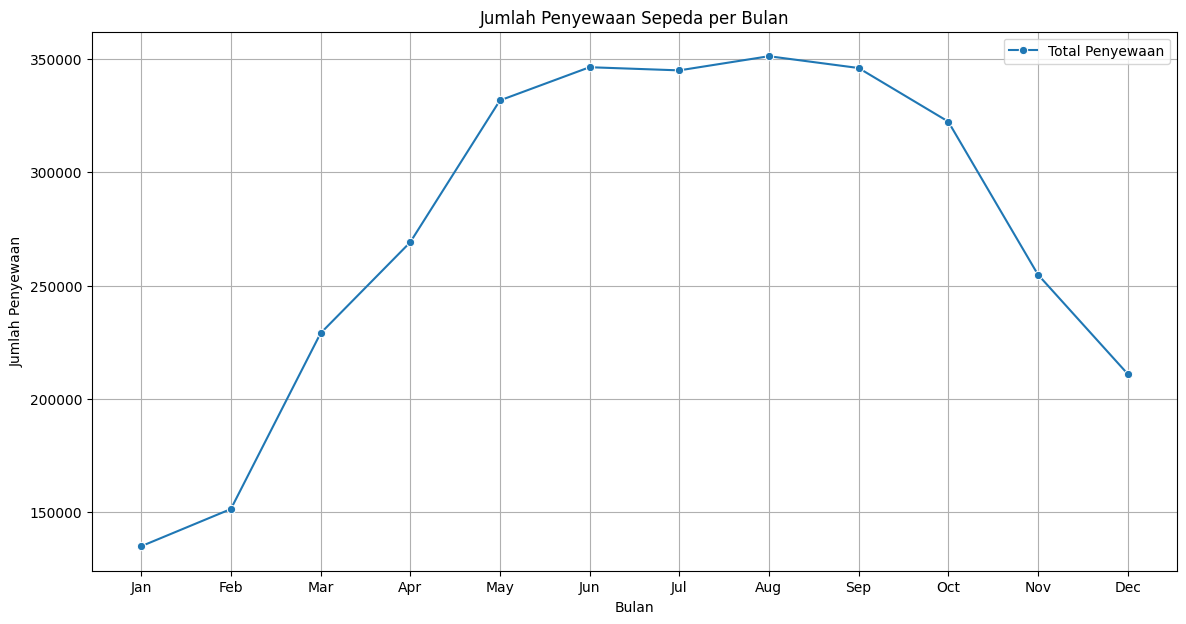

In [51]:
months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months_all_years['mnth'] = months_labels

plt.figure(figsize=(14, 7))
sns.lineplot(data=months_all_years, x='mnth', y=('cnt', 'sum'), marker='o', label='Total Penyewaan')

plt.ylabel('Jumlah Penyewaan')

plt.title('Jumlah Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.grid()
plt.show()

**Insight:**
1. Musim Puncak Penyewaan: Jumlah penyewaan sepeda mencapai puncaknya pada bulan Agustus dengan jumlah 351194 penyewaan. Ini menunjukkan bahwa ada peningkatan permintaan selama bulan-bulan ini
2. Tren Musiman: Penyewaan sepeda cenderung meningkat dari Januari hingga mencapai puncaknya di pertengahan tahun, kemudian menurun kembali hingga Desember. Ini menunjukkan adanya pola musiman yang konsisten.

### Pertanyaan 2: Bagaimana hubungan antara faktor cuaca dan jumlah penyewaan sepeda di setiap musim?


In [88]:
season_weather_counts = day_df.groupby(['season', 'weathersit']).agg({
    'cnt': 'sum'
}).reset_index()
season_weather_counts

,season,weathersit,cnt
0,1,1,312036
1,1,2,155573
2,1,3,3739
3,2,1,626986
4,2,2,288096
5,2,3,3507
6,3,1,799443
7,3,2,250679
8,3,3,11007
9,4,1,519487


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


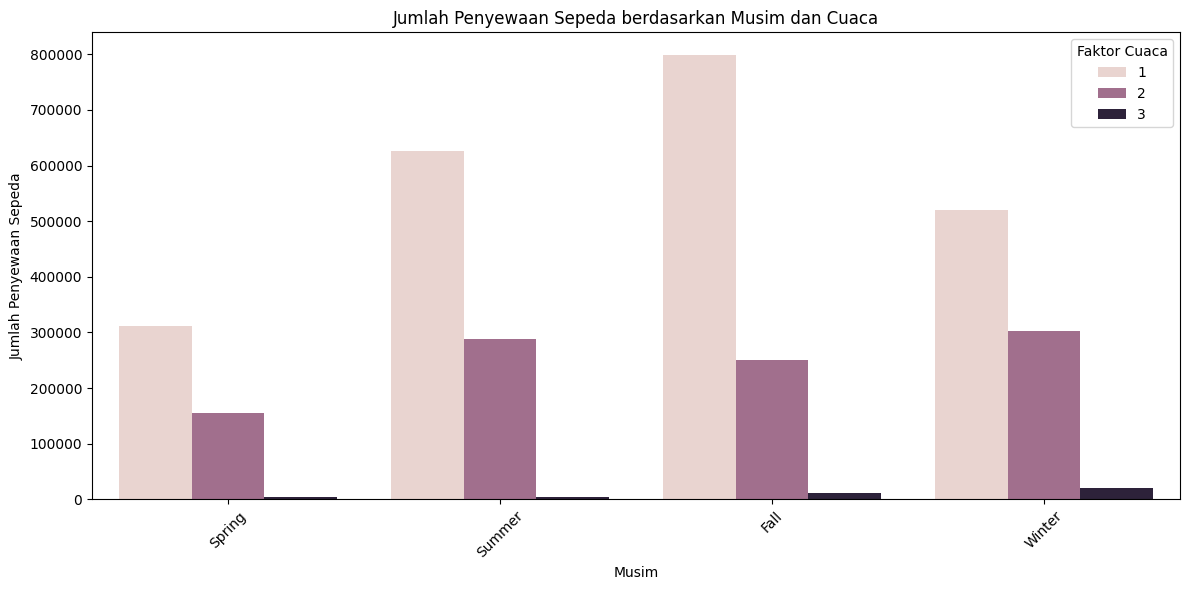

In [89]:
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
season_weather_counts['season'] = season_weather_counts['season'].map(season_mapping)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(data=season_weather_counts, x='season', y='cnt', hue='weathersit')
plt.title('Jumlah Penyewaan Sepeda berdasarkan Musim dan Cuaca')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend(title='Faktor Cuaca')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Keteranngan:**

weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

**Insight:**

1. Musim Paling Produktif:
  - Musim Fall (Musim Gugur) adalah yang paling produktif dalam hal penyewaan sepeda, dengan 799,443 penyewaan saat kondisi cuaca baik (faktor cuaca 1). Hal ini menunjukkan bahwa orang cenderung lebih banyak bersepeda pada musim gugur dengan cuaca yang nyaman.

2. Cuaca yang Berbeda Mempengaruhi Penyewaan:
  - **Summer (Musim Panas)** juga menunjukkan jumlah penyewaan yang tinggi (626,986 untuk faktor cuaca 1), namun tidak sebanyak musim gugur. Ini mungkin disebabkan oleh cuaca panas yang kadang-kadang membuat orang kurang bersepeda.
  - **Spring (Musim Semi)** memiliki jumlah penyewaan yang lebih rendah dibandingkan dengan musim panas dan gugur, namun tetap lebih tinggi daripada Winter (Musim Dingin).

3. Kondisi Cuaca Buruk Mengurangi Penyewaan:
  - Pada faktor cuaca 2 dan 3 (yang kemungkinan merepresentasikan kondisi cuaca kurang baik, seperti mendung atau hujan), jumlah penyewaan sepeda menurun signifikan di semua musim. Ini menunjukkan bahwa cuaca buruk secara langsung mempengaruhi keputusan orang untuk menyewa sepeda.
  - Terutama, pada **Winter**, meskipun cuaca baik (faktor cuaca 1) masih menghasilkan 519,487 penyewaan, tetapi jumlah ini jauh lebih rendah dibandingkan dengan musim lainnya.

4. Konsistensi dalam Penyewaan:
  - Penyewaan sepeda cenderung stabil di musim dengan cuaca baik (faktor cuaca 1) di semua musim. Ini mengindikasikan bahwa faktor cuaca yang baik sangat penting untuk meningkatkan aktivitas bersepeda.

### Pertanyaan 3: Bagaimana tren penyewaan sepeda untuk pengguna casual dan registered dari bulan ke bulan?


In [59]:
months_all_years = day_df.groupby(by="mnth").agg({
    "casual": ["sum", "max", "min", "mean", "std"],
    "registered": ["sum", "max", "min", "mean", "std"],
    "cnt": ["sum", "mean", "std"]
})
months_all_years

casual                                     registered              \
        sum   max  min         mean         std        sum   max   min   
mnth                                                                     
1     12042  1070    9   194.225806  197.384490     122891  4185   416   
2     14963  1435   47   262.508772  232.283549     136389  4546   905   
3     44444  3155   46   716.838710  624.308094     184476  5893   491   
4     60802  3252  120  1013.366667  738.345585     208292  5950   674   
5     75285  3410  255  1214.274194  754.950311     256401  6433  2213   
6     73906  2963  477  1231.766667  664.017647     272436  6456  2993   
7     78157  3065  562  1260.596774  598.382778     266791  6790  2298   
8     72039  2827  226  1161.919355  466.576274     279155  6541   889   
9     70323  3160  118  1172.050000  738.378375     275668  6946  1689   
10    59760  3031    2   963.870968  703.205576     262592  6911    20   
11    36603  2290   69   610.050000  470.933096     218228  5520   935   
12    21693  1153    9   349.887097  222.634531     189343  6055   432   

                                   cnt                            
             mean          std     sum         mean          std  
mnth                                                              
1     1982.112903  1053.274474  134933  2176.338710  1161.674370  
2     2392.789474  1091.126003  151352  2655.298246  1145.313307  
3     2975.419355  1513.254354  228920  3692.258065  1899.301812  
4     3471.533333  1414.571151  269094  4484.900000  1776.160778  
5     4135.500000  1093.179612  331686  5349.774194  1298.711561  
6     4540.600000  1012.958885  346342  5772.366667  1240.400031  
7     4303.080645  1190.542490  344948  5563.677419  1273.751871  
8     4502.500000  1335.126601  351194  5664.419355  1494.516146  
9     4594.466667  1547.716749  345991  5766.516667  1810.130649  
10    4235.354839  1685.022519  322352  5199.225806  1988.392517  
11    3637.133333  1219.589045  254831  4247.183333  1285.712709  
12    3053.919355  1465.052959  211036  3403.806452  1549.639353

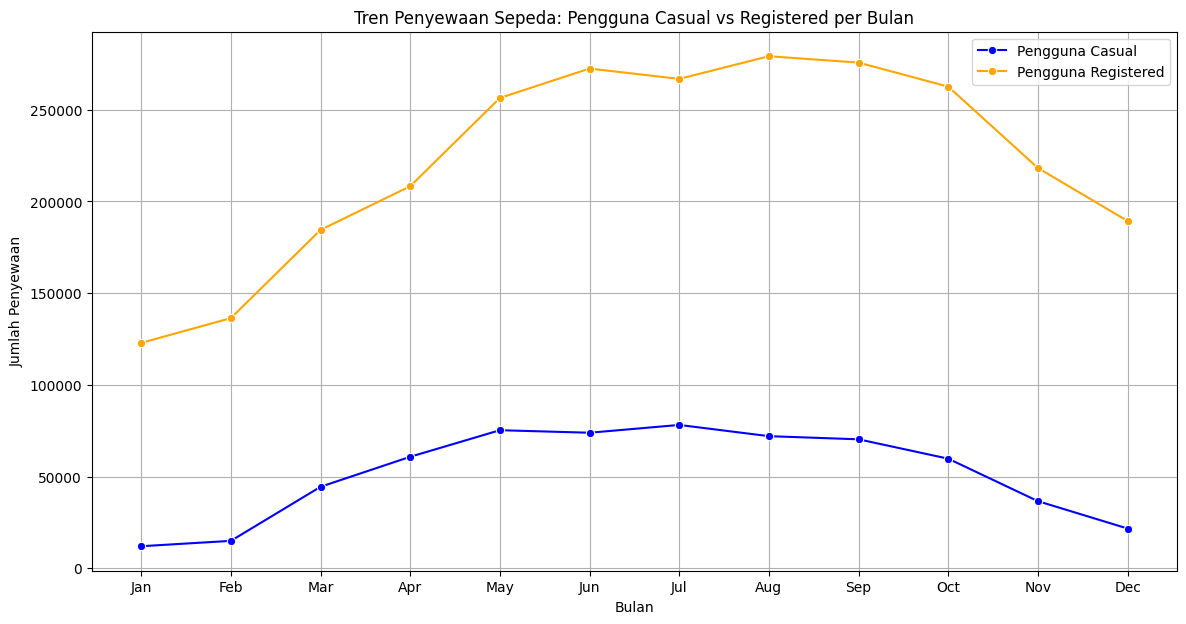

In [60]:
months_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months_all_years['mnth'] = months_labels

plt.figure(figsize=(14, 7))

sns.lineplot(data=months_all_years, x='mnth', y=('casual', 'sum'), marker='o', label='Pengguna Casual', color='blue')
sns.lineplot(data=months_all_years, x='mnth', y=('registered', 'sum'), marker='o', label='Pengguna Registered', color='orange')

plt.title('Tren Penyewaan Sepeda: Pengguna Casual vs Registered per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.grid()
plt.legend()
plt.show()

**Insight:**

1. Perbandingan Tren Pengguna Casual dan Registered
Pengguna Terdaftar (Registered) memiliki jumlah sewa yang secara signifikan lebih tinggi dibandingkan dengan Pengguna Kasual (Casual) sepanjang tahun.
Puncak penyewaan pengguna terdaftar terjadi pada bulan Juni, Juli, dan Agustus sementara pengguna kasual mencapai puncaknya pada bulan yang sama. Ini bisa menandakan bahwa musim panas adalah waktu paling aktif untuk penyewaan sepeda, mungkin karena cuaca yang mendukung dan liburan.

2. Periode Penurunan Aktivitas Penyewaan
Setelah mencapai puncaknya pada bulan Juni hingga Agustus, penyewaan untuk kedua jenis pengguna mulai menurun dari bulan September hingga Desember. Ini mungkin disebabkan oleh faktor musiman seperti cuaca buruk (musim gugur dan musim dingin) atau perubahan dalam rutinitas pengguna (seperti kembali ke sekolah atau bekerja).
Penurunan ini lebih tajam pada pengguna casual dibandingkan dengan pengguna terdaftar. Mungkin pengguna terdaftar memiliki kebutuhan yang lebih rutin (seperti perjalanan harian), sementara pengguna kasual cenderung lebih musiman.
3. Pola Musiman Penyewaan Sepeda
Penyewaan sepeda oleh pengguna kasual cenderung lebih rendah pada awal tahun, namun meningkat secara signifikan dari bulan Maret hingga Agustus. Puncak pengguna kasual adalah di bulan Juli, yang bisa dihubungkan dengan kegiatan rekreasi di luar ruangan selama musim panas.
Pengguna terdaftar juga mengalami peningkatan selama periode yang sama, tetapi lebih konsisten sepanjang tahun. Hal ini bisa jadi karena mereka menggunakan sepeda untuk keperluan sehari-hari seperti bekerja atau aktivitas lainnya.
4. Variabilitas Pengguna Casual vs Registered
Dari tabel, terlihat bahwa rata-rata penyewaan pengguna terdaftar jauh lebih tinggi dibandingkan pengguna kasual. Contoh di bulan Juni, rata-rata penyewaan pengguna terdaftar adalah 4.540, sementara pengguna kasual hanya 1.231.
Ini menunjukkan bahwa pengguna terdaftar cenderung lebih banyak melakukan perjalanan per bulan dibandingkan dengan pengguna kasual, menunjukkan bahwa pengguna terdaftar mungkin memiliki komitmen lebih besar untuk menggunakan sepeda sebagai sarana transportasi.


## Analisis Lanjutan (Opsional)

###**Analisis Clustering (Manual Grouping)**

In [120]:
years = day_df.groupby(by="yr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).reset_index()
years

,yr,casual,registered,cnt
0,0,247252,995851,1243103
1,1,372765,1676811,2049576


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


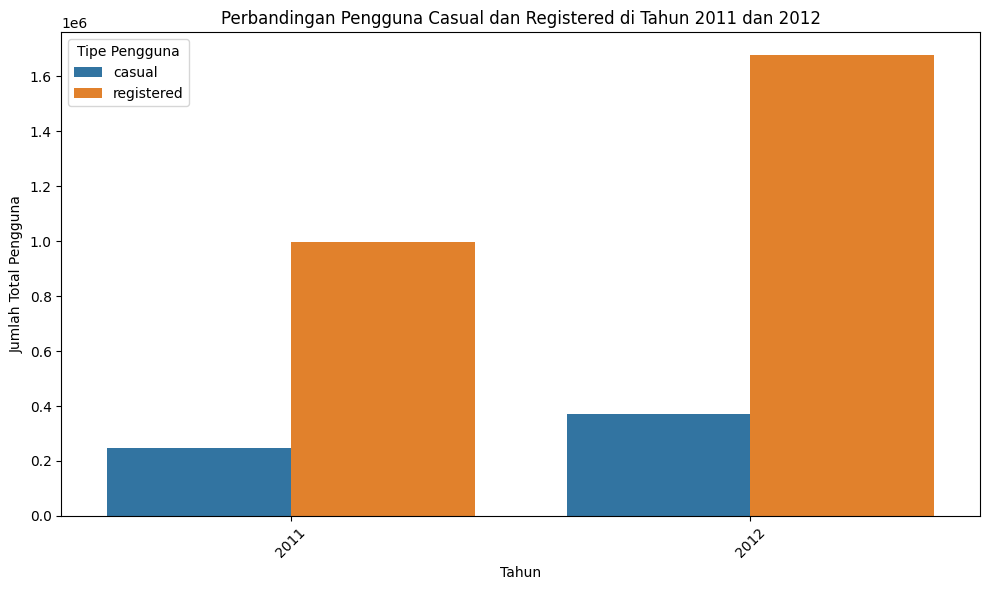

In [121]:
years['yr'] = years['yr'].map({0: 2011, 1: 2012})

# Melting DataFrame untuk visualisasi
melted_years = years.melt(id_vars='yr', value_vars=['casual', 'registered'],
                           var_name='user_type', value_name='total_users')

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(data=melted_years, x='yr', y='total_users', hue='user_type')

plt.title('Perbandingan Pengguna Casual dan Registered di Tahun 2011 dan 2012')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Total Pengguna')
plt.legend(title='Tipe Pengguna')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Conclusions

**1. Tren Jumlah Penyewaan Sepeda Setiap Bulannya**
  - Musim Puncak Penyewaan: Bulan Agustus mencatat jumlah penyewaan tertinggi dengan 351.194 penyewaan, menunjukkan adanya peningkatan permintaan.
  - Tren Musiman: Penyewaan sepeda meningkat dari Januari hingga mencapai puncak di pertengahan tahun, kemudian mengalami penurunan hingga Desember. Ini menunjukkan adanya pola musiman yang konsisten dalam perilaku penyewaan sepeda.

**2. Hubungan antara Faktor Cuaca dan Jumlah Penyewaan Sepeda di Setiap Musim**
  - Musim Paling Produktif: Musim gugur menjadi yang paling produktif dengan 799.443 penyewaan saat cuaca baik, menunjukkan preferensi bersepeda yang tinggi pada musim ini.
  - Pengaruh Cuaca: Musim panas juga menunjukkan penyewaan yang tinggi, meskipun tidak setinggi musim gugur, yang mungkin disebabkan oleh cuaca panas yang kadang mengurangi keinginan bersepeda. Musim semi mencatat jumlah penyewaan lebih rendah, sementara musim dingin mencatat yang terendah.
Kondisi Cuaca Buruk: Penyewaan menurun signifikan di semua musim pada kondisi cuaca buruk, menunjukkan dampak langsung cuaca terhadap keputusan untuk menyewa sepeda.
Konsistensi Penyewaan: Penyewaan tetap stabil saat cuaca baik di semua musim, menunjukkan bahwa cuaca yang mendukung sangat penting untuk meningkatkan aktivitas bersepeda.

**3. Tren Penyewaan Sepeda untuk Pengguna Casual dan Registered dari Bulan ke Bulan**
  - Perbandingan Pengguna: Pengguna terdaftar memiliki jumlah penyewaan yang jauh lebih tinggi dibandingkan pengguna kasual sepanjang tahun, dengan puncak penyewaan di bulan Juni, Juli, dan Agustus untuk keduanya.
  -Penurunan Aktivitas Penyewaan: Setelah puncak musim panas, penyewaan untuk kedua kelompok mulai menurun dari September hingga Desember, dengan penurunan yang lebih tajam pada pengguna kasual. Hal ini menunjukkan bahwa pengguna terdaftar memiliki kebutuhan yang lebih rutin.
  - Pola Musiman Penyewaan: Pengguna kasual mengalami peningkatan penyewaan yang signifikan dari Maret hingga Agustus, dengan puncak di Juli. Sebaliknya, pengguna terdaftar menunjukkan penyewaan yang lebih konsisten sepanjang tahun.
  - Variabilitas Pengguna: Rata-rata penyewaan pengguna terdaftar jauh lebih tinggi dibandingkan pengguna kasual, menunjukkan bahwa pengguna terdaftar lebih sering menggunakan sepeda sebagai sarana transportasi.